In [ ]:
dataset['Sft_Price'].describe()

count    38306.0
mean       140.0
std         80.0
min          5.5
25%         63.0
50%        139.0
75%        176.0
max        399.0
Name: Sft_Price, dtype: float64

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


dataset = pd.read_csv('v4.csv')
dataset.rename(columns={'Total Living Area': 'Total_Living_Area'}, inplace=True)
dataset['Total_Living_Area'] = dataset['Total_Living_Area'].astype('float64')
dataset['Deed_Date'] = dataset['Deed_Date'].astype('datetime64[ns]')
dataset['Council_District'] = dataset['Council_District'].astype('string')
dataset['Police_District'] = dataset['Police_District'].astype('string')
dataset['Neighborhood'] = dataset['Neighborhood'].astype('string')
dataset['Print_Key'] = dataset['Print_Key'].astype('string')
dataset['Street'] = dataset['Street'].astype('string')
dataset['Front'] = dataset['Front'].astype('float64')
dataset['Land_Value'] = dataset['Land_Value'].astype('float64')
dataset['Total_Value'] = dataset['Total_Value'].astype('float64')
dataset['Sale_Price'] = dataset['Sale_Price'].astype('float64')
dataset['Year_Built'] = dataset['Year_Built'].astype('int64')
dataset['Census_Tract'] = dataset['Census_Tract'].astype('float64')


In [ ]:
from pandas.core.indexes.interval import date_range
from scipy.optimize.lbfgsb import float64

num_vars = ['Front', 'Depth', 'Beds','Total_Living_Area','Zipcode','Deed_Date']
num_vars_y=['Total_Living_Area','Sale_Price']

gt=dataset[num_vars];
gt = gt[gt.Total_Living_Area != 0]
gt = gt.reset_index(drop=True)
bt = dataset[num_vars_y]
bt = bt[bt.Total_Living_Area != 0]
bt = bt.reset_index(drop=True)
print(len(gt))
print(len(bt))
print(len(dataset))

ddate=[];
for i in range (gt.Deed_Date.size):
    ddate.append(dataset.Deed_Date[i].year*100+dataset.Deed_Date[i].month);
gt.Deed_Date=ddate

yt=[]
for i in range (bt.Total_Living_Area.size):
   yt.append((bt.Sale_Price[i])/(bt.Total_Living_Area[i]))
print(yt[592])

saleprice=[]
for i in range (bt.Total_Living_Area.size):
   saleprice.append((bt.Sale_Price[i]))
print(saleprice[592])
gt.head()

38305
38305
38306
160.37390029325513
437500.0


,Front,Depth,Beds,Total_Living_Area,Zipcode,Deed_Date
0,25.00,53.55,3,2185.0,14202,201209
1,27.08,33.00,4,1620.0,14201,201709
2,25.00,46.33,2,1700.0,14202,201911
3,25.50,33.00,3,1700.0,14201,201611
4,32.50,126.00,2,1232.0,14220,202109


In [ ]:
sum=0
for i in range(0,38305):
  if(dataset.Zipcode[i]==14215):
    sum=sum+1
print(sum)


5837


In [ ]:
dataset.Zipcode

0        14202
1        14201
2        14202
3        14201
4        14220
         ...  
38301    14211
38302    14210
38303    14207
38304    14215
38305    14206
Name: Zipcode, Length: 38306, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(dataset.Sft_Price,dataset.Zipcode, test_size = 1/4, random_state = 0)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train.values.reshape(-1,1), Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
zipcodes_sprice=[]
sprice_zips=[]

for j in range(14200,14230):
  count=0
  sum=0
  for i in range(1,400):
    if(classifier.predict([[i]])[0]==j and classifier.predict([[i]])[0]!= 14212
       and classifier.predict([[i]])[0]!= 14215
       and classifier.predict([[i]])[0]!= 14216
       and classifier.predict([[i]])[0]!= 14220
       and classifier.predict([[i]])[0]!= 14203):
      count=count+1;
      sum=sum+i;
  if(count!=0):
    zipcodes_sprice.append(str(j))
    sprice_zips.append(sum/count)

print(zipcodes_sprice)

# print(classifier.predict([[i]])[0])





['14201', '14202', '14206', '14208', '14209', '14211', '14213', '14214', '14222']


AttributeError: ignored

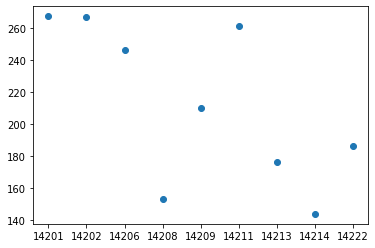

In [ ]:
plt.scatter(zipcodes_sprice,sprice_zips)

In [ ]:
print(zipcodes_sprice)
sprice_zips

['14201', '14202', '14206', '14208', '14209', '14211', '14213', '14214', '14222']


[267.2830188679245,
 266.578125,
 246.0,
 153.0,
 210.35714285714286,
 261.0,
 176.44444444444446,
 144.0,
 186.11475409836066]

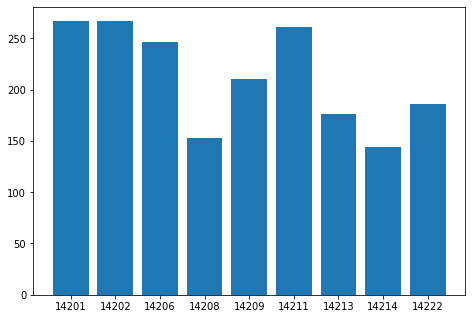

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(zipcodes_sprice,sprice_zips)
plt.show()

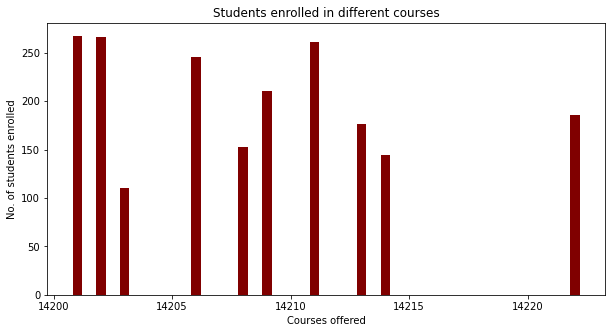

In [ ]:

# creating the dataset

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(zipcodes_sprice, sprice_zips, color ='maroon',
        width = 0.4)

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()